In [23]:
import pandas as pd
import os

# Define the data directory
data_dir = r'C:\Users\hboki\OneDrive - ku.ac.ae\SmartNIALMeter dataset\preprocessed'

# List all buildings
buildings = [f for f in os.listdir(data_dir) if f.startswith('building')]

# Load data from building 01 as an example
building_number = 'building_01'
building_path = os.path.join(data_dir, building_number)

# List all appliances in the building
appliances = os.listdir(building_path)

# Load data for a specific appliance, e.g., 'washing_machine.h5'
appliance_file = 'washing_machine.h5'
appliance_path = os.path.join(building_path, appliance_file)

# Load the data using pd.read_hdf
df = pd.read_hdf(appliance_path, key='/data', mode='r')

# If timestamps are not included in the DataFrame, you might need to add them
# This step depends on how the data is structured in the h5 file
# If timestamps are already included, you can skip this part

# Assuming the index is the timestamp, ensure it's in datetime format
if not isinstance(df.index, pd.DatetimeIndex):
    df.index = pd.to_datetime(df.index)

# Set the index name to 'timestamp' if it's not already set
if df.index.name != 'timestamp':
    df.index.name = 'timestamp'

# Display the first few rows of the DataFrame
print(df.head())

# Display information about the DataFrame
print(df.info())

                     Active Power L1  Active Power L2  Active Power L3  \
timestamp                                                                
2018-01-30 11:20:40              0.0              0.0    -3.547524e-07   
2018-01-30 11:20:45              0.0              0.0    -1.405365e-06   
2018-01-30 11:20:50              0.0              0.0    -2.769797e-06   
2018-01-30 11:20:55              0.0              0.0    -4.134230e-06   
2018-01-30 11:21:00              0.0              0.0    -5.498662e-06   

                     Reactive Power L1  Reactive Power L2  Reactive Power L3  \
timestamp                                                                      
2018-01-30 11:20:40                0.0                0.0                0.0   
2018-01-30 11:20:45                0.0                0.0                0.0   
2018-01-30 11:20:50                0.0                0.0                0.0   
2018-01-30 11:20:55                0.0                0.0                0.0   
2

In [24]:
df.head()


,Active Power L1,Active Power L2,Active Power L3,Reactive Power L1,Reactive Power L2,Reactive Power L3,Apparent Power L1,Apparent Power L2,Apparent Power L3
timestamp,,,,,,,,,
2018-01-30 11:20:40,0.0,0.0,-3.547524e-07,0.0,0.0,0.0,0.0,0.0,3.547524e-07
2018-01-30 11:20:45,0.0,0.0,-1.405365e-06,0.0,0.0,0.0,0.0,0.0,1.405365e-06
2018-01-30 11:20:50,0.0,0.0,-2.769797e-06,0.0,0.0,0.0,0.0,0.0,2.769797e-06
2018-01-30 11:20:55,0.0,0.0,-4.134230e-06,0.0,0.0,0.0,0.0,0.0,4.134230e-06
2018-01-30 11:21:00,0.0,0.0,-5.498662e-06,0.0,0.0,0.0,0.0,0.0,5.498662e-06


In [25]:
df.describe()
# df.isnull().sum()


,Active Power L1,Active Power L2,Active Power L3,Reactive Power L1,Reactive Power L2,Reactive Power L3,Apparent Power L1,Apparent Power L2,Apparent Power L3
count,1.792847e+07,1.792847e+07,1.792847e+07,1.792847e+07,1.792847e+07,1.792847e+07,1.792847e+07,1.792847e+07,1.792847e+07
mean,5.285018e+00,4.306823e+00,4.751672e+00,-6.259539e-03,-4.585513e+00,9.648772e-04,5.296292e+00,1.742628e+01,4.766379e+00
std,1.071262e+02,3.541712e+01,9.831322e+01,3.925877e+00,4.288884e+01,3.748348e+00,1.072549e+02,5.693438e+01,9.844259e+01
min,0.000000e+00,-1.087160e+01,-9.829331e-02,-9.148838e+02,-3.639215e+02,-8.323179e+02,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.031113e+01,0.000000e+00,0.000000e+00,1.003476e+01,0.000000e+00
50%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.019086e+01,0.000000e+00,0.000000e+00,1.020380e+01,0.000000e+00
75%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.000718e+01,0.000000e+00,0.000000e+00,1.032282e+01,0.000000e+00
max,2.390986e+03,9.755537e+02,2.240935e+03,8.357871e+02,8.493834e+02,8.249863e+02,2.390986e+03,1.004821e+03,2.240935e+03


In [26]:
# Identify active power columns
active_power_columns = ['Active Power L1', 'Active Power L2', 'Active Power L3']

# Set negative active power values to zero
df[active_power_columns] = df[active_power_columns].clip(lower=0)


In [27]:
# Calculate Total Active Power
df['Total Active Power'] = df['Active Power L1'] + df['Active Power L2'] + df['Active Power L3']

# Optionally, calculate Total Reactive Power and Total Apparent Power
df['Total Reactive Power'] = df['Reactive Power L1'] + df['Reactive Power L2'] + df['Reactive Power L3']
df['Total Apparent Power'] = df['Apparent Power L1'] + df['Apparent Power L2'] + df['Apparent Power L3']

# Drop individual phase columns if they are no longer needed
df.drop(columns=[
    'Active Power L1', 'Active Power L2', 'Active Power L3',
    'Reactive Power L1', 'Reactive Power L2', 'Reactive Power L3',
    'Apparent Power L1', 'Apparent Power L2', 'Apparent Power L3'
], inplace=True)


In [28]:
# Resample data to 1-minute intervals, calculating the mean
df_resampled = df.resample('1T').mean()

# Handle any missing values after resampling
df_resampled.fillna(method='ffill', inplace=True)

C:\Users\hboki\AppData\Local\Temp\ipykernel_25696\3258782587.py:2: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  df_resampled = df.resample('1T').mean()
C:\Users\hboki\AppData\Local\Temp\ipykernel_25696\3258782587.py:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_resampled.fillna(method='ffill', inplace=True)


In [29]:
df_resampled

,Total Active Power,Total Reactive Power,Total Apparent Power
timestamp,,,
2018-01-30 11:20:00,0.0,0.000000,0.000002
2018-01-30 11:21:00,0.0,0.000000,0.000013
2018-01-30 11:22:00,0.0,0.000000,0.000029
2018-01-30 11:23:00,0.0,0.000000,0.000046
2018-01-30 11:24:00,0.0,0.000000,0.000062
...,...,...,...
2020-12-02 23:55:00,0.0,-10.141281,10.141281
2020-12-02 23:56:00,0.0,-10.190815,10.190815
2020-12-02 23:57:00,0.0,-10.262172,10.262172


In [30]:
# Add time-based features
df_resampled['hour'] = df_resampled.index.hour
df_resampled['day_of_week'] = df_resampled.index.dayofweek  # Monday=0, Sunday=6
df_resampled['is_weekend'] = df_resampled['day_of_week'].apply(lambda x: 1 if x >= 5 else 0)


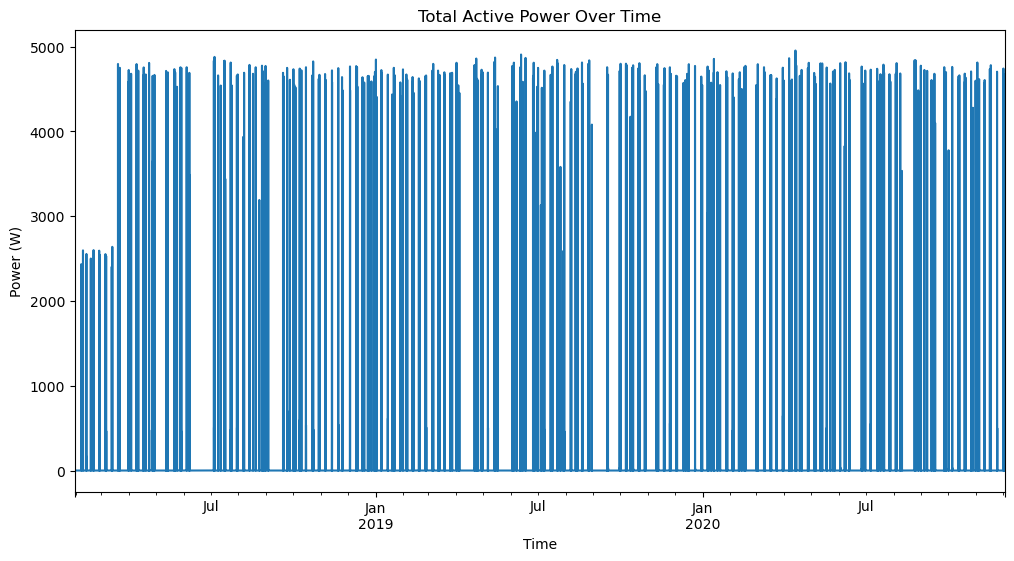

In [31]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
df_resampled['Total Active Power'].plot()
plt.title('Total Active Power Over Time')
plt.xlabel('Time')
plt.ylabel('Power (W)')
plt.show()

In [32]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# Features to scale
features_to_scale = ['Total Active Power', 'Total Reactive Power', 'Total Apparent Power']

df_resampled[features_to_scale] = scaler.fit_transform(df_resampled[features_to_scale])


In [34]:
# Define feature columns
feature_columns = ['Total Active Power', 'hour', 'day_of_week', 'is_weekend']

df_resampled.head()

,Total Active Power,Total Reactive Power,Total Apparent Power,hour,day_of_week,is_weekend
timestamp,,,,,,
2018-01-30 11:20:00,0.0,0.10129,4.208232e-10,11,1,0
2018-01-30 11:21:00,0.0,0.10129,2.526265e-09,11,1,0
2018-01-30 11:22:00,0.0,0.10129,5.707290e-09,11,1,0
2018-01-30 11:23:00,0.0,0.10129,8.888316e-09,11,1,0
2018-01-30 11:24:00,0.0,0.10129,1.206934e-08,11,1,0


In [35]:
import pandas as pd
import os

# Define the data directory
data_dir = r'C:\Users\hboki\OneDrive - ku.ac.ae\SmartNIALMeter dataset\preprocessed'

# List all buildings
buildings = [f for f in os.listdir(data_dir) if f.startswith('building')]

# Initialize a dictionary to store data for all devices
device_data = {}

for building in buildings:
    building_path = os.path.join(data_dir, building)
    appliances = os.listdir(building_path)
    
    for appliance_file in appliances:
        appliance_name = appliance_file.replace('.h5', '')
        appliance_path = os.path.join(building_path, appliance_file)
        
        # Load the data
        try:
            df = pd.read_hdf(appliance_path, key='/data', mode='r')
            
            # Ensure the timestamp index is set
            if not isinstance(df.index, pd.DatetimeIndex):
                df.index = pd.to_datetime(df.index)
            df.index.name = 'timestamp'
            
            # Store the data
            device_id = f"{building}_{appliance_name}"
            device_data[device_id] = df
        except Exception as e:
            print(f"Error loading {appliance_path}: {e}")


In [ ]:
import numpy as np

for device_id, df in device_data.items():
    # Handle negative values in Active Power
    active_power_columns = [col for col in df.columns if 'Active Power' in col]
    df[active_power_columns] = df[active_power_columns].clip(lower=0)
    
    # Combine Active Power across phases
    df['Total Active Power'] = df[active_power_columns].sum(axis=1)
    
    # Handle negative values in Reactive Power (if any)
    reactive_power_columns = [col for col in df.columns if 'Reactive Power' in col]
    if reactive_power_columns:
        df[reactive_power_columns] = df[reactive_power_columns].clip(lower=0)
        # Combine Reactive Power across phases
        df['Total Reactive Power'] = df[reactive_power_columns].sum(axis=1)
    else:
        # If Reactive Power is not provided, you may need to calculate or set it to zero
        df['Total Reactive Power'] = 0  # Placeholder, adjust as needed
    
    # Calculate Apparent Power
    df['Total Apparent Power'] = np.sqrt(df['Total Active Power']**2 + df['Total Reactive Power']**2)
    
    # Resample data to 1-minute intervals
    df = df.resample('1T').mean()
    
    # Forward-fill missing values
    df.fillna(method='ffill', inplace=True)
    
    # Update the data in the dictionary
    device_data[device_id] = df


In [ ]:
for device_id, df in device_data.items():
    # Ensure that the index is a DatetimeIndex
    if not isinstance(df.index, pd.DatetimeIndex):
        df.index = pd.to_datetime(df.index)
        df.index.name = 'timestamp'
    
    # Add hour of the day
    df['hour'] = df.index.hour
    
    # Add day of the week
    df['day_of_week'] = df.index.dayofweek  # Monday=0, Sunday=6
    
    # Add is_weekend flag
    df['is_weekend'] = df['day_of_week'].apply(lambda x: 1 if x >= 5 else 0)
    
    # Add month
    df['month'] = df.index.month
    
    # Add other features if needed (e.g., is_holiday, temperature)
    # For example, if you have temperature data:
    # df['temperature'] = temperature_series.reindex(df.index, method='nearest')
    
    # Update the data in the dictionary
    device_data[device_id] = df


In [ ]:
from sklearn.cluster import KMeans

def determine_threshold(power_series):
    # Reshape data for clustering
    X = power_series.values.reshape(-1, 1)
    
    # Apply K-Means clustering with 2 clusters
    kmeans = KMeans(n_clusters=2, random_state=42).fit(X)
    centers = kmeans.cluster_centers_.flatten()
    
    # Sort centers to identify low and high power clusters
    centers.sort()
    low_center, high_center = centers
    
    # Set threshold as the midpoint between cluster centers
    threshold = (low_center + high_center) / 2
    return threshold

# Apply to all devices
thresholds = {}

for device_id, df in device_data.items():
    power_series = df['Total Active Power']
    
    # Only consider non-zero power values to avoid clustering on zeros
    non_zero_power = power_series[power_series > 0]
    
    if len(non_zero_power) > 0:
        threshold = determine_threshold(non_zero_power)
    else:
        # If the device is always off, set threshold to a minimal value
        threshold = 0.1
    
    thresholds[device_id] = threshold


In [ ]:
for device_id, df in device_data.items():
    threshold = thresholds[device_id]
    
    # Create 'state' column
    df['state'] = df['Total Active Power'].apply(
        lambda x: 1 if x >= threshold else 0
    )
    
    # Update the data in the dictionary
    device_data[device_id] = df


In [ ]:
from sklearn.preprocessing import MinMaxScaler

for device_id, df in device_data.items():
    scaler = MinMaxScaler()
    features_to_scale = ['Total Active Power', 'Total Reactive Power', 'Total Apparent Power', 'prev_total_active_power', 'rolling_mean_power']
    df[features_to_scale] = scaler.fit_transform(df[features_to_scale])
    
    # Update the data in the dictionary
    device_data[device_id] = df

In [ ]:
output_dir = 'processed_devices'
os.makedirs(output_dir, exist_ok=True)

for device_id, df in device_data.items():
    output_path = os.path.join(output_dir, f"{device_id}.csv")
    df.to_csv(output_path)

In [ ]:
from functools import reduce

# List of DataFrames to merge
df_list = [df for df in device_data.values()]

# Merge all DataFrames on the timestamp index
combined_df = reduce(lambda left, right: pd.merge(left, right, left_index=True, right_index=True, how='outer'), df_list)

# Fill missing values if necessary
combined_df.fillna(0, inplace=True)